# Lecture 3: Data manipulation for data analysis

Process/manipulate the data to make it easier to do the desired analysis (do the successful picks look different than the unsuccessful ones?)


In [5]:
import numpy as np
import json as json
import matplotlib.pyplot as plt
import csv

## Manipulation 1: Make it easier to access a channel by name

Read in the data description add the "By name" dictionary, and write out
Note the use of the .. in order to get a file from the next directory over.

In [4]:
try:
    with open("../Week_1_arrays/Data/week1_check_results.json", "r") as fp:
        pick_data_description = json.load(fp)

        pick_data_description["By name"] = {}
        for i, d in enumerate(pick_data_description["Data channels"]):
            pick_data_description["By name"][d["name"]] = i

    with open("Data/week3_check_results.json", "w") as fp:
        json.dump(pick_data_description, fp)

except FileNotFoundError:
    print(f"The file was not found; check that the data directory is in the current one and the file is in that directory")


## Manipulation 2: Reorganize into an n-pick X data channel X n time steps array

Also separate out the pick succes y/n column.
This was an optional assignment, btw.

In [7]:
pick_data = np.loadtxt("../Week_1_arrays/Data/proxy_pick_data.csv", dtype="float", delimiter=",")

data_channels = pick_data_description["Data channels"]
n_time_steps = pick_data_description["n_time_steps"]
n_step_size = pick_data_description["n_total_dims"]
time_step = 1/30

# Separate the data into pick success y/n and a n_pick X n_channels X n_timesteps array
pick_data_success_fail = pick_data[:, -1]
n_picks = pick_data.shape[0]
pick_data_reorg = pick_data[:, 0:-1].reshape([n_picks, n_step_size, n_time_steps], order='F')

# Plot all of the channels for one pick 
See what the data looks like

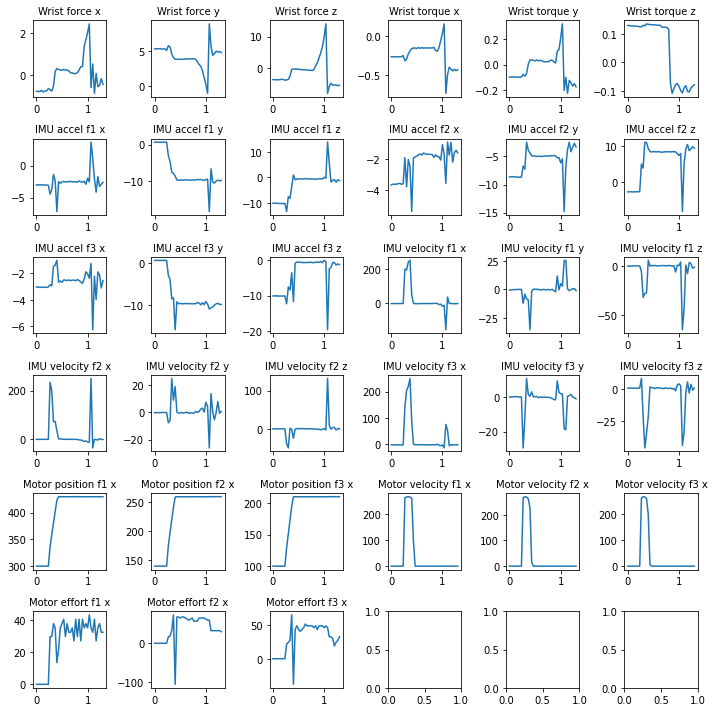

In [10]:
# Make sure enough plots (should probably be set by number of channels)
n_rows = 6
n_cols = 6
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10,10))

# Pick a row
row_to_plot = 0

# t values for all plots
ts = np.arange(start=0, stop=n_time_steps * time_step, step=time_step)

# Keep a running index to figure out which plot to plot in
which_plot_index = 0
map_xyz = ('x', 'y', 'z')
for ch in pick_data_description["Data channels"]:
    for xyz in range(0, ch["dimensions"]):
        # Use mod & div to decide which row/col to plot in
        #   the r,c on the left is an example of packing/unpacking -
        #   could do this on two lines, but this "makes sense"
        r, c = (which_plot_index // n_cols, which_plot_index % n_cols)
        axs[r, c].plot(ts, pick_data_reorg[row_to_plot, ch["index_offset"] + xyz, :])
        axs[r, c].set_title(ch["name"] + " " + map_xyz[xyz], fontsize=10)
        which_plot_index += 1  # One of the rare cases to create and increment a loop variable

plt.tight_layout()

#  Get the data for one channel, one dimension, to make it easier to plot

This is set up so that it's easy to change out which channel/dimension to plot.
Writing the data out to a csv file for use in lab

In [11]:
# Name and dimension of the channel we want to plot
ch_name = "Motor position f1"
dim = 0

# Use the newly-created dictionary to get the data channel's index
data_channel_index = pick_data_description["By name"][ch_name]
# ... starting column is index_offset + dimension
ch_to_plot = pick_data_description["Data channels"][data_channel_index]["index_offset"] + dim

# Use boolean indexing to pull out just the successful/failed picks
data_successful = pick_data_reorg[pick_data_success_fail == 1, ch_to_plot]
data_failed = pick_data_reorg[pick_data_success_fail == 0, ch_to_plot]

# Write the separated data out as a csv file
with open('Data/week3_' + ch_name + '_successful.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(data_successful)

with open('Data/week3_' + ch_name + '_failed.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(data_failed)


# Plot several pick's worth of data to see what it looks like 

All from the same channel - see how it varies from pick to pick (if it does)
Top half is successful picks, bottom half unsuccessful


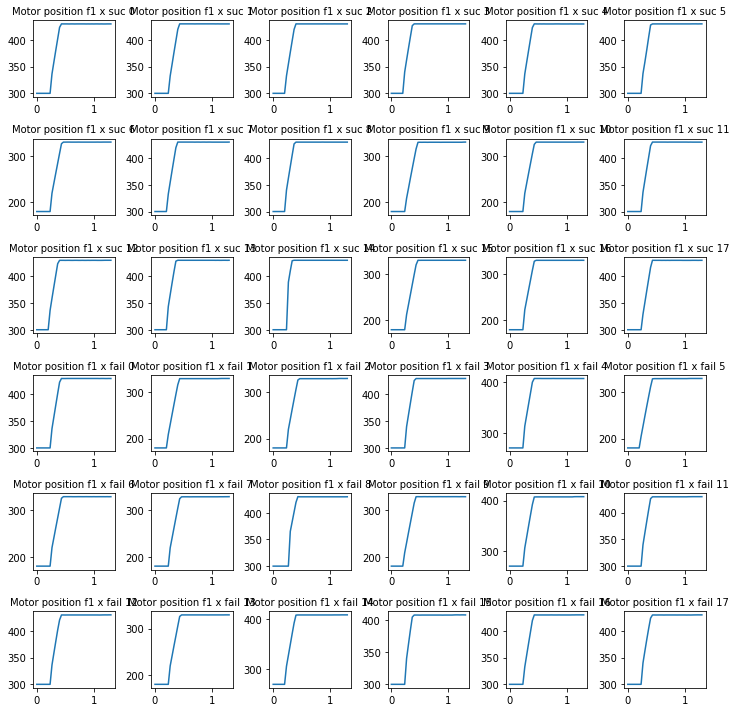

In [12]:
n_rows = 6
n_cols = 6
fig, axs = plt.subplots(n_rows, n_rows, figsize=(10, 10))
for p in range(0, (n_rows // 2) * n_cols):
    r, c = p // n_cols, p % n_cols
    axs[r, c].plot(ts, data_successful[p])
    axs[r, c].set_title(f"{ch_name} {map_xyz[dim]}" + f" suc {p}", fontsize=10)

for p in range(0, (n_rows // 2) * n_cols):
    r, c = 3 + p // n_cols, p % n_cols
    axs[r, c].plot(ts, data_failed[p])
    axs[r, c].set_title(f"{ch_name} {map_xyz[dim]}" + f" fail {p}", fontsize=10)

plt.tight_layout()
